In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
!pip install joypy
import joypy

In [4]:
yol = "column_2C_weka.csv"
df = pd.read_csv(yol)


In [5]:
# Data types
# 1)Numeric Data: Numeric data consists of numbers and can be further divided into two subtypes:
#Continuous: Continuous data can take any value within a range. Examples include real numbers like height, weight, temperature, etc.
#Discrete: Discrete data can only take specific values within a range. Examples include counts of items, such as the number of bedrooms in a house.

#2) Categorical Data: Categorical data represents characteristics or attributes with a fixed number of possible values. It can be further classified into:
#Ordinal: Ordinal data has a natural ordering among its categories. For example, ratings (low, medium, high) or education levels (elementary, high school, college).
#Nominal: Nominal data has categories with no inherent order. Examples include colors, cities, or types of animals.

#3)Text Data: Text data consists of strings of characters, such as sentences, documents, or words. Natural Language Processing (NLP) techniques are often applied to process and analyze text data.

#4)Image Data: Image data consists of pixel values arranged in a grid. Each pixel represents a feature of the image, such as color intensity. Convolutional Neural Networks (CNNs) are commonly used for tasks involving image data.

#5)Time Series Data: Time series data is a sequence of data points collected or recorded at successive and equally spaced points in time. Examples include stock prices, weather measurements, or sensor readings.

#6)Spatial Data: Spatial data refers to data associated with geographic locations or spatial coordinates. It's common in applications such as Geographic Information Systems (GIS) or satellite imagery analysis.

#7)Audio Data: Audio data represents sound waves, typically sampled at regular intervals. Speech recognition and music classification are common tasks involving audio data.

print(df.dtypes)

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object


In [6]:
# Missing Values
# Missing value demek bazı datalarda o veri girilmemiş veya girilmek istenmemiş demektir.Eğer datalarda null değerler görürsek ilk başta null değerleri halletmemiz gerekir yoksa datayı yanlış yorumlarız. Bunu da data cleaning kısmında yaparız.
# Null değerleri düzeltirken bazen 0 olarak düzeltiriz,bazen de columnun ortalama değerlerine göre o null değerleri düzeltiriz.

missingvalues = df.isnull().sum()
print(missingvalues)


pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [7]:
# Columnlar için spesifik null değerlerine bakma
spesifikcolumn = df['pelvic_incidence'].isnull() # spesifik column
print(spesifikcolumn)

0      False
1      False
2      False
3      False
4      False
       ...  
305    False
306    False
307    False
308    False
309    False
Name: pelvic_incidence, Length: 310, dtype: bool


In [8]:
spesifikcolumn2 = df['pelvic_incidence'].isnull().sum() # toplam null sayısı
print(spesifikcolumn2)

0


In [49]:
# Outliers
# Outlier bir datada aykırı değere sahip olan veriyi gösterir. Outlierler modellerin performansını etkileyebilir.Kullanıcıyı yanıltabilir. Bu yüzden dikkat edilmesi gerekir.Veri görselleştirmede outlierler kolaylıkla tespit edilebilir.
# Mesela bir datanın verileri genel olarak 3,4,4,3,5,6,5 gibi değerlerden oluşuyor diyelim. Eğer 60,70,65,100,1000 gibi uç değerler görüyorsak dikkat etmemiz gerekir çünkü datanın ortalama değerleri çok sapar ve çok yanıltıcı olur.


TypeError: unsupported operand type(s) for -: 'str' and 'str'

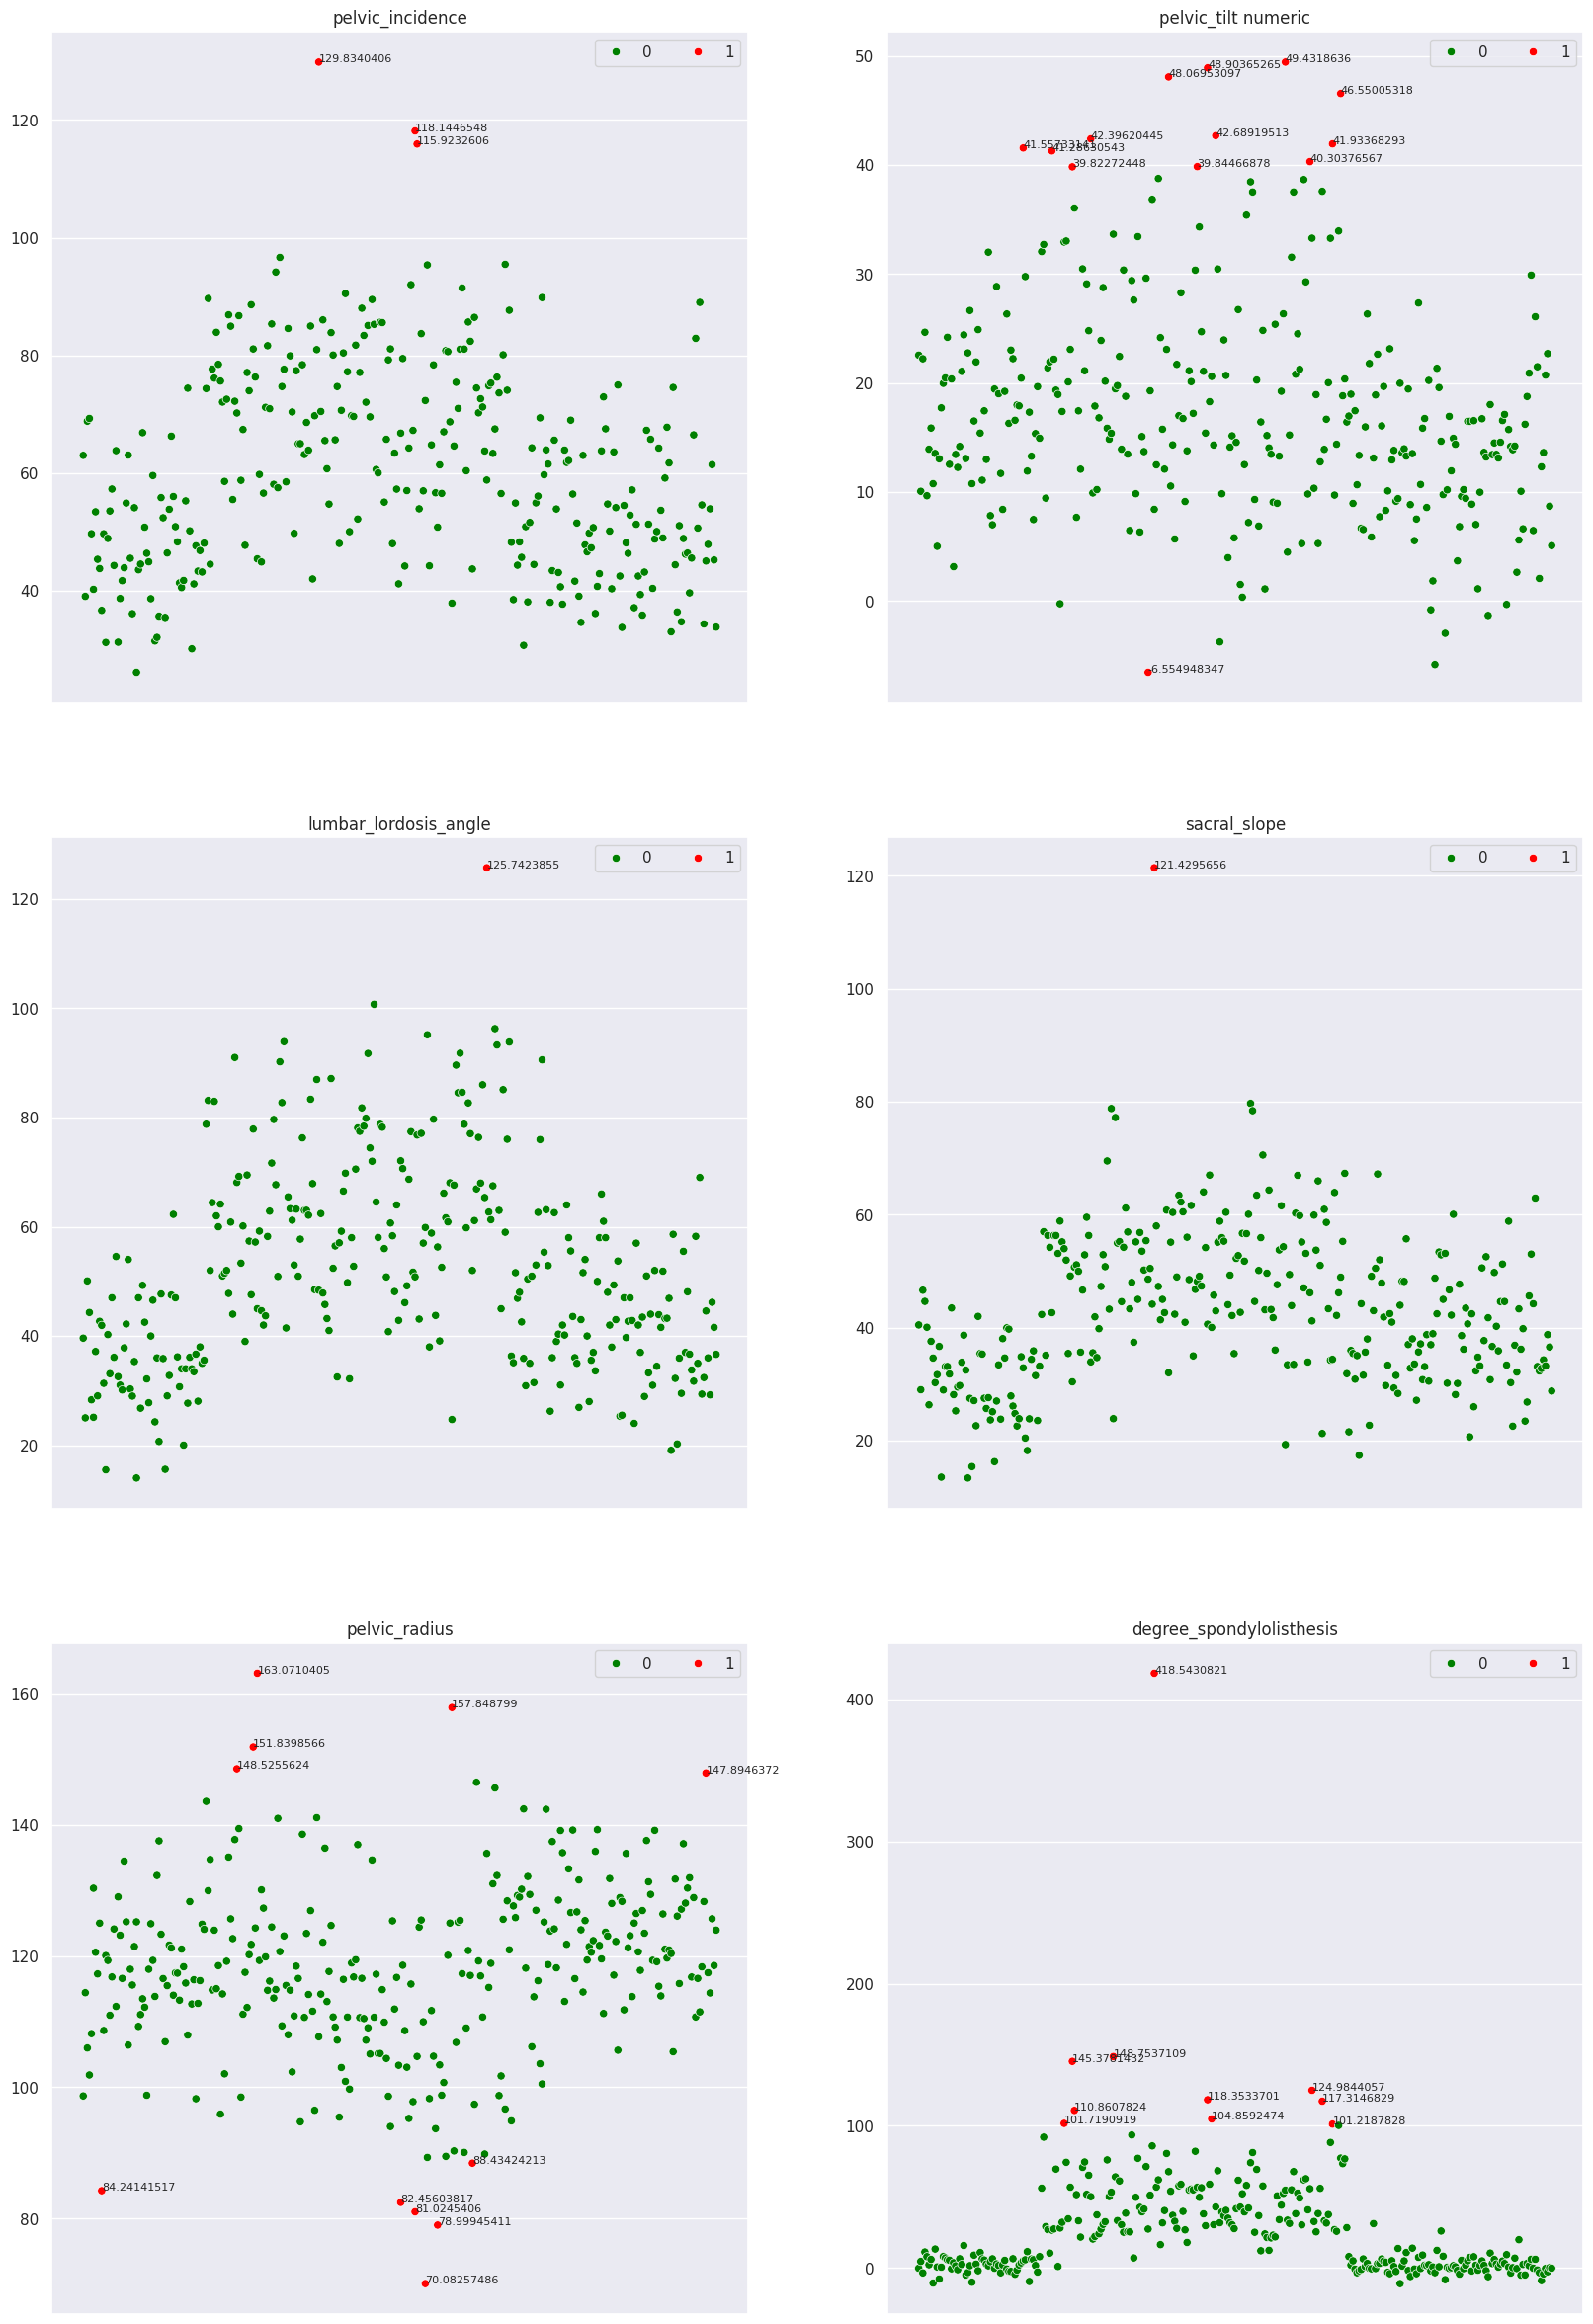

In [50]:
#Any value below the lower bound and above the upper bound are considered to be outliers.
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(df[i], 1.5)

    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

TypeError: Could not convert AbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalAbnormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormal to numeric

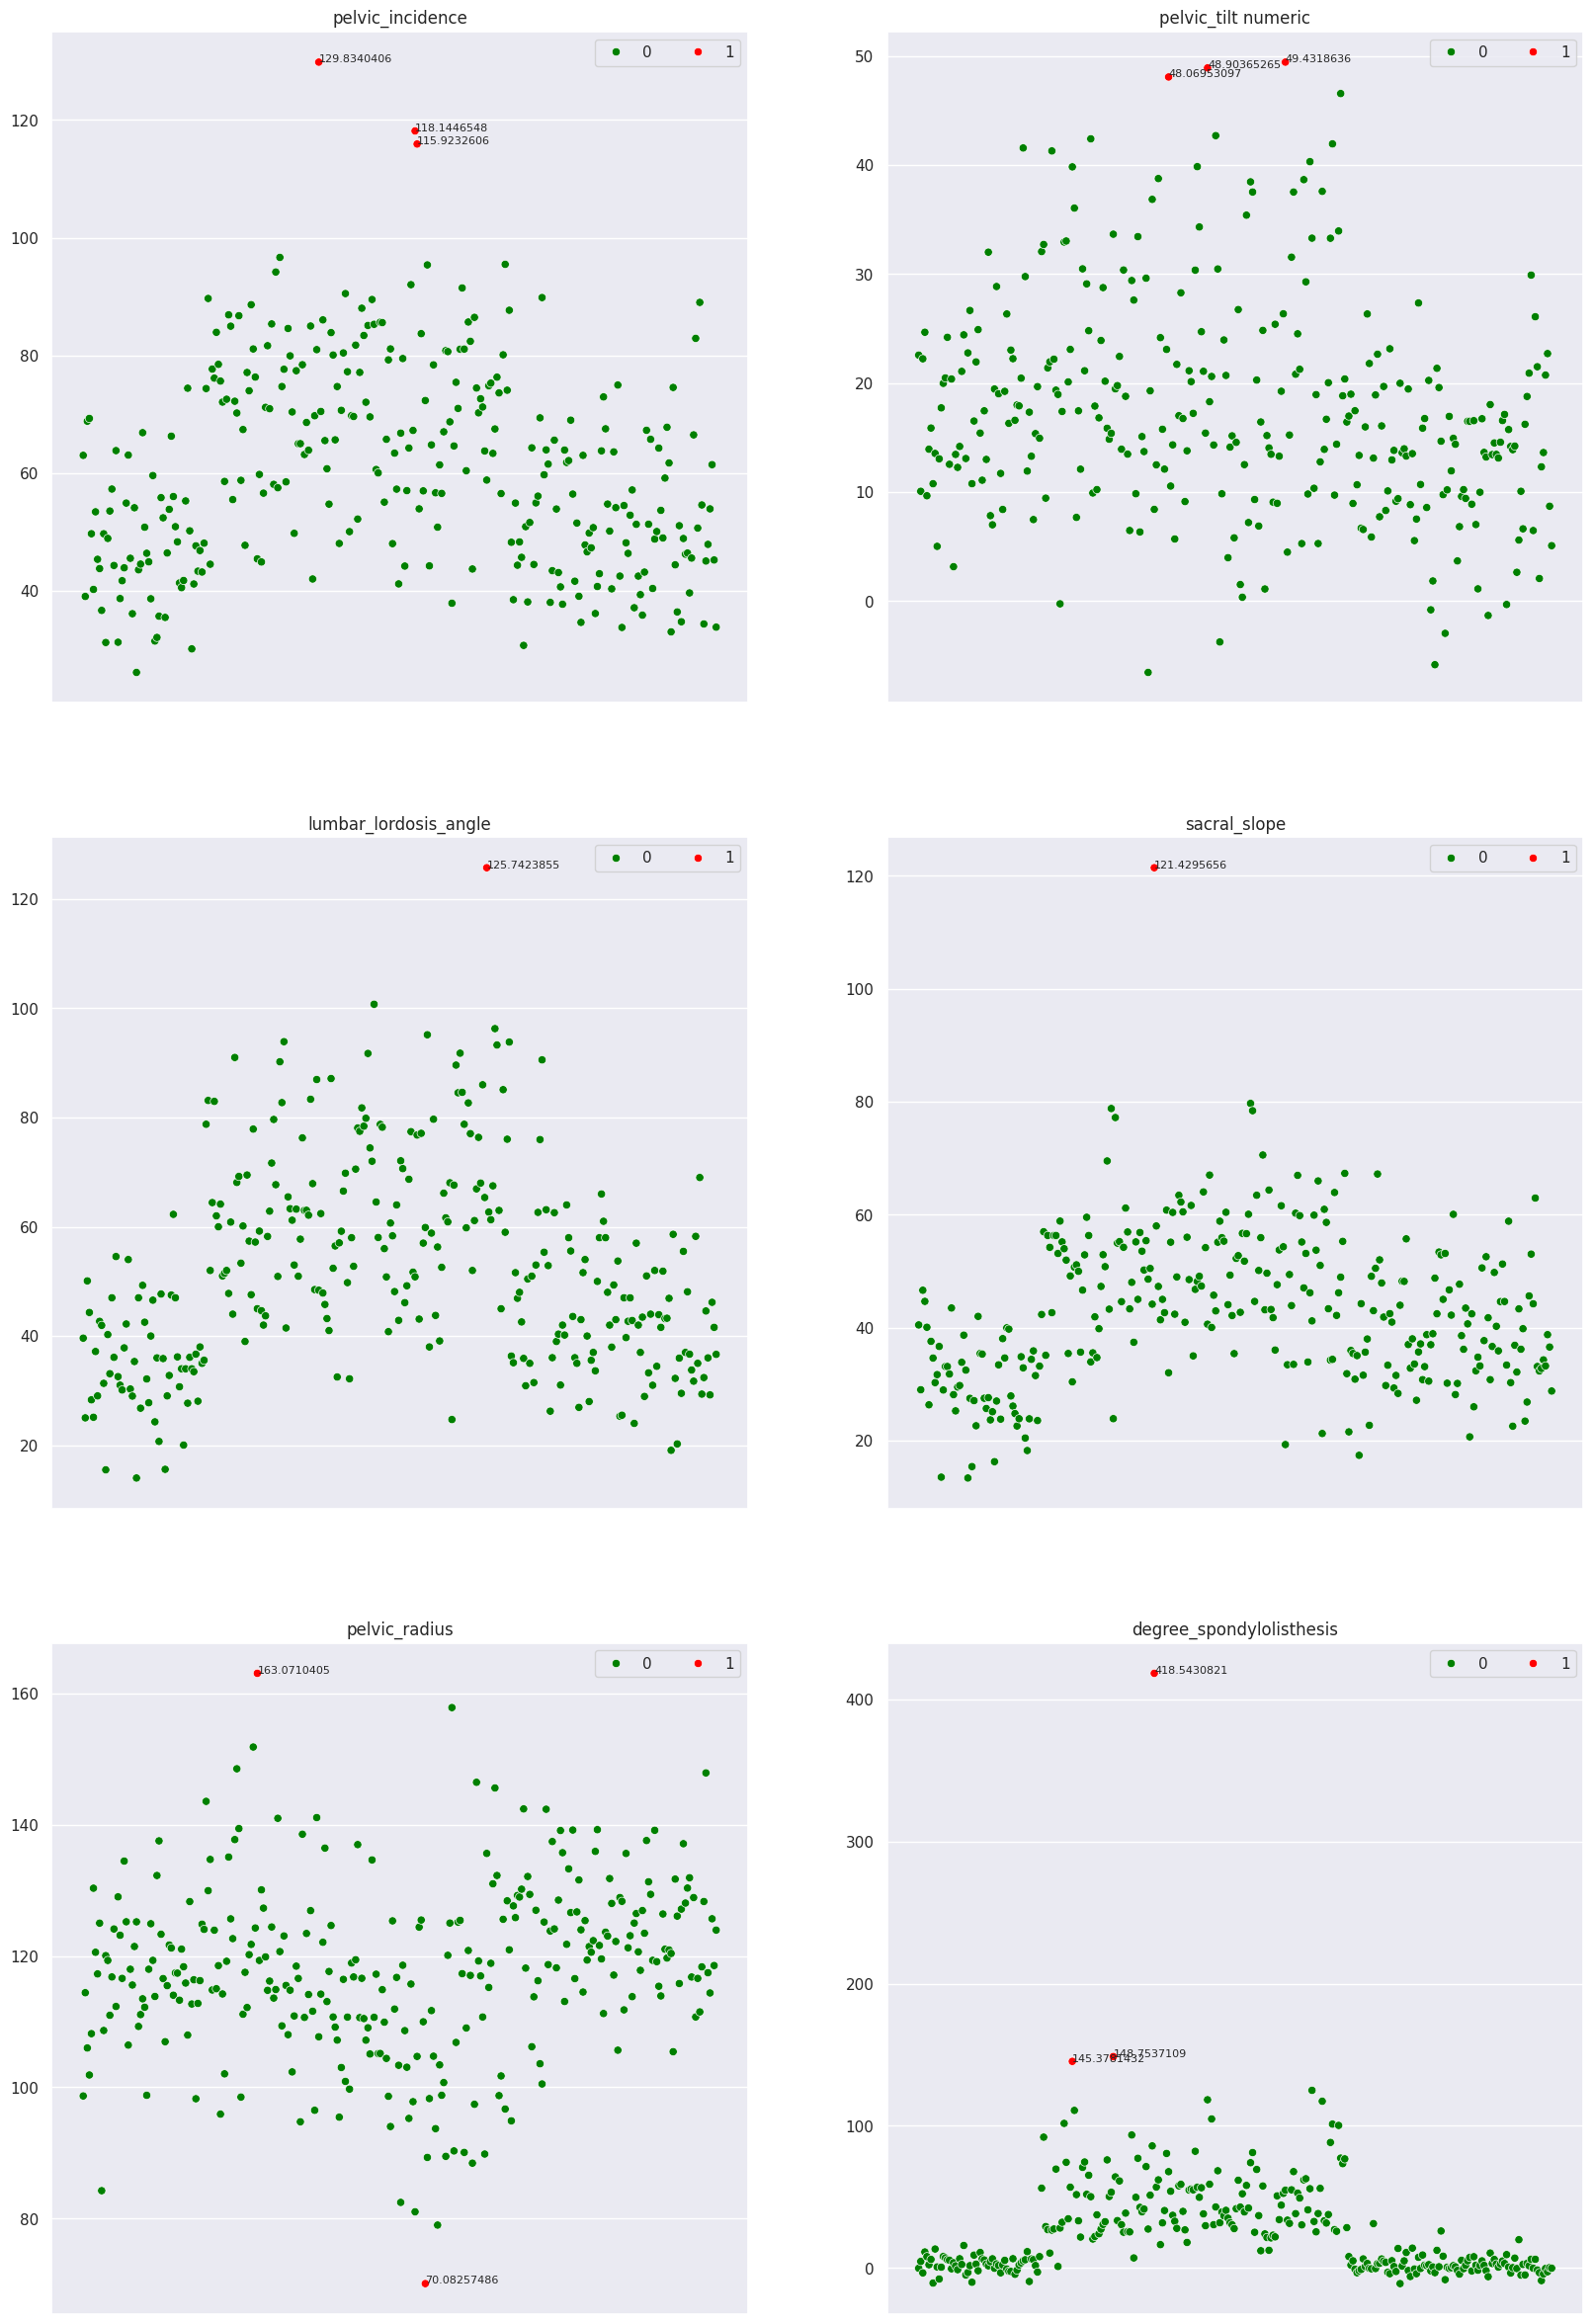

In [51]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(3, 2, figsize=(20, 30))
row = col = 0
for n,i in enumerate(df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(df[i], -3, 3)

    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(df[i])), y = df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(df[i]))[outliers == 1], df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
ax[row,col].axis('off')
plt.show()

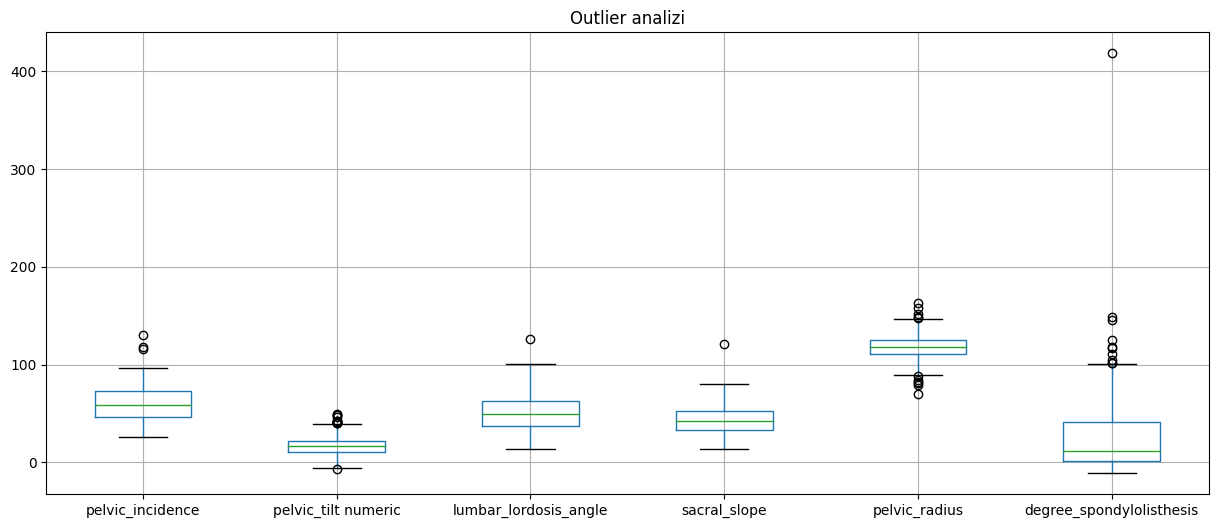

In [13]:
plt.figure(figsize=(15, 6))
df.boxplot()
plt.title("Outlier analizi")
plt.show()

In [14]:
# Unique Values
# Unique valuelar adı üzerinden anlaşılacağı gibi datadaki sadece spesifik olan değerleri yani diğer değerlerden farklı olan değerleri yazdırır. Mesela veri 4,4,4,4,4,5,5, diye değerlere sahipse unique valuelar burada 4 ve 5tir.
uniquevalues = df['class'].unique()
print(uniquevalues)

['Abnormal' 'Normal']


In [15]:
# Correlation
# Correlation istatistikte çok önemli bir yere sahip. Bir verinin istatiksel ilişkileri hakkında yorum yapmak için kullanılır. Mesela x ve y değerleri olsun.Y değerleri x değerlerinin artmasıyla artıyor mu azalıyor mu nasıl bir ilişkiye sahip bunu gösterir. Linear bir ilişki mi veya exponential mı bunu öğreniriz.
# Bunun için correlation coefficient türetilir. Bu katsayı -1 ve +1 arasında değişir. -1'e çok yakınsa strong linear negative association vardır. +1'e çok yakınsa strong linear positive association vardır.0'a yakınsa genellikle no association veya weak linear ilişki diyebiliriz. Dataya göre değişir.
# +1'e yakınsa bir değerin artmasıyla diğer değer de artar. -1'e yakınsa bir değerin artmasıyla diğer değer azalır gibisinden yorumlar yapılabilir
# İstatistikte scatter plotta bunu anlamak daha kolay olur.
numeric_df = df.select_dtypes(include=['number'])

# Korelasyon matrisi
correlationmatrix = numeric_df.corr()
print(correlationmatrix)

                          pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.629199   
pelvic_tilt numeric               0.629199             1.000000   
lumbar_lordosis_angle             0.717282             0.432764   
sacral_slope                      0.814960             0.062345   
pelvic_radius                    -0.247467             0.032668   
degree_spondylolisthesis          0.638743             0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt numeric                    0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667   

In [30]:
# Spesifik olarak iki column arasındaki correlationu istiyorsak
correlation = df['pelvic_incidence'].corr(df['pelvic_radius'])
print(correlation)

-0.24746720592269386


In [53]:
correlation = df['sacral_slope'].corr(df['pelvic_incidence'])
print(correlation)

0.8149599891850366


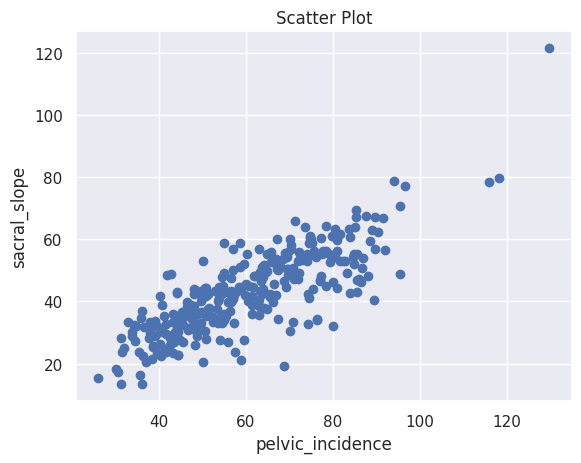

In [54]:
x = df['pelvic_incidence']
y = df['sacral_slope']
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.title('Scatter Plot')
plt.show()

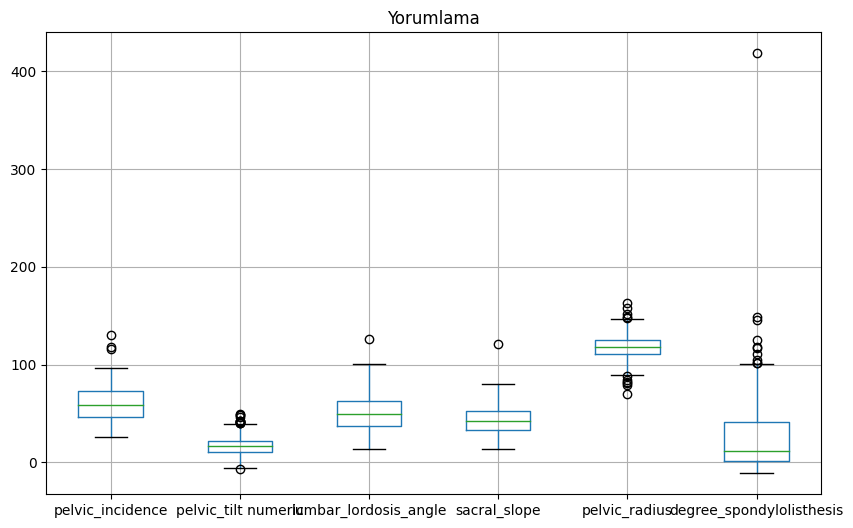

In [18]:
# Visualizing and interpreting data

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Yorumlama")
plt.show()

In [19]:
# Kutu grafikleri, bir veri kümesinin beş özelliğini gösterir: minimum değer, ilk (%25) çeyrek, medyan, üçüncü (%75) çeyrek ve maksimum değer.
# Kutu ne kadar uzun olursa veri o kadar dağılmış olur. Kutu ne kadar küçük olursa veri o kadar az dağılmış olur.
# Bir kutu grafiğini incelerken, bir aykırı değer, kutu grafiğinin bıyıklarının dışında bulunan bir veri noktası olarak tanımlanır.
# Medyan çizgisine göre columnların hangi dağılıma sahip olduğunu anlayabiliriz. Tam ortalıyor gibiyse normal dağılım veya approx normal dağılım. Ortanın altında kalıyorsa positively skewedtir. Üstüne kalıyorsa negatively skewed bir dağılıma sahiptir.
# Medianın box plot üzerindeki konumu, ortalamanın genel dağılım içindeki tahmini konumunu verebilir. Eğer veri setiniz simetrik ise veya aykırı değerler çok fazla değilse, median ortalama değeri iyi bir şekilde temsil edecektir.

In [20]:
# Data analysis by grouping

gruplama = df.groupby('pelvic_incidence')
print(gruplama) # veriyi objecte dönüştürüp depolar

In [21]:
print(df.groupby('pelvic_incidence')['class'])
#Here, GroupBy has returned a SeriesGroupBy object. No computation will be done until we specify the agg function

In [22]:
print(df.groupby('pelvic_incidence')['class'].sum()) # tüm sütunları iki variable'a göre sıralar.

pelvic_incidence
26.147921     Abnormal
30.149936     Abnormal
30.741938       Normal
31.232387     Abnormal
31.276012     Abnormal
                ...   
95.480229     Abnormal
96.657315     Abnormal
115.923261    Abnormal
118.144655    Abnormal
129.834041    Abnormal
Name: class, Length: 310, dtype: object


In [32]:
filtreleme1 = df['class']=='Normal' ## Anlarızki 100 tane normal class var
print(df[filtreleme1])

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
210         38.505273            16.964297              35.112814   
211         54.920858            18.968430              51.601455   
212         44.362490             8.945435              46.902096   
213         48.318931            17.452121              48.000000   
214         45.701789            10.659859              42.577846   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis   class  
210     21.540976     127.632875                  7.986683  Normal  
211     35.952428     125.846646 

In [10]:
filtreleme2 = df['class']=='Abnormal'
print(df[filtreleme2])

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027817            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
205         80.111572            33.942432              85.101608   
206         95.480229            46.550053              59.000000   
207         74.094731            18.823727              76.032156   
208         87.679087            20.365613              93.822416   
209         48.259920            16.417462              36.329137   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  
1       28.995960     114.405

In [33]:
averageincidence = df[filtreleme1]['pelvic_incidence'].mean()
print(averageincidence) # 100 tane normal classa sahip olanlar arasındaki pelvic incidence meanine ulaştık

51.6852444376


In [34]:
averageincidence2 = df[filtreleme2]['pelvic_incidence'].mean()
dfoutput = pd.DataFrame({'Class':['Normal','Abnormal'],'Mean':[averageincidence,averageincidence2]})
print(dfoutput)

      Class       Mean
0    Normal  51.685244
1  Abnormal  64.692562


In [35]:
print(df.groupby('class').mean()) # tek kodla tüm sütunları class'a göre gruplama.

          pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
class                                                                    
Abnormal         64.692562            19.791111              55.925370   
Normal           51.685244            12.821414              43.542605   

          sacral_slope  pelvic_radius  degree_spondylolisthesis  
class                                                            
Abnormal      44.90145     115.077713                 37.777705  
Normal        38.86383     123.890834                  2.186572  


In [36]:
obj = df.groupby('pelvic_incidence')
print(obj.groups) # değerlerin excelde hangi rowda olduğunu bulma

{26.14792141: [26], 30.14993632: [53], 30.74193812: [215], 31.23238734: [11], 31.27601184: [17], 31.48421834: [35], 32.09098679: [36], 33.04168754: [287], 33.78884314: [263], 33.84164075: [309], 34.38229939: [303], 34.64992241: [243], 34.75673809: [292], 35.49244617: [40], 35.70345781: [37], 35.8775708: [273], 36.12568347: [24], 36.15782981: [250], 36.42248549: [290], 36.68635286: [9], 37.14014978: [269], 37.7319919: [234], 37.90391014: [180], 38.04655072: [228], 38.12658854: [217], 38.50527283: [210], 38.66325708: [33], 38.69791243: [18], 39.05695098: [1], 39.08726449: [242], 39.35870531: [272], 39.65690201: [296], 40.25019968: [5], 40.34929637: [258], 40.41336566: [278], 40.55735663: [48], 40.6832291: [233], 40.74699612: [251], 41.17167989: [54], 41.18776972: [154], 41.35250407: [47], 41.6469159: [240], 41.72996308: [19], 41.76773173: [49], 42.02138603: [112], 42.51561014: [271], 42.51727249: [262], 42.91804052: [252], 43.11795103: [232], 43.1919153: [274], 43.20318499: [58], 43.3496

In [37]:
#The agg() function in Pandas gives us the flexibility to perform several statistical computations all at once! Here is how it works.
print(df.groupby('class').agg([np.mean,np.median])) # tüm variableların mean ve medianını yazdırma

         pelvic_incidence            pelvic_tilt numeric             \
                     mean     median                mean     median   
class                                                                 
Abnormal        64.692562  65.274888           19.791111  18.798899   
Normal          51.685244  50.123115           12.821414  13.482435   

         lumbar_lordosis_angle            sacral_slope             \
                          mean     median         mean     median   
class                                                               
Abnormal             55.925370  56.150000     44.90145  44.639597   
Normal               43.542605  42.638923     38.86383  37.059694   

         pelvic_radius             degree_spondylolisthesis             
                  mean      median                     mean     median  
class                                                                   
Abnormal    115.077713  115.650323                37.777705  31.946516  
Normal

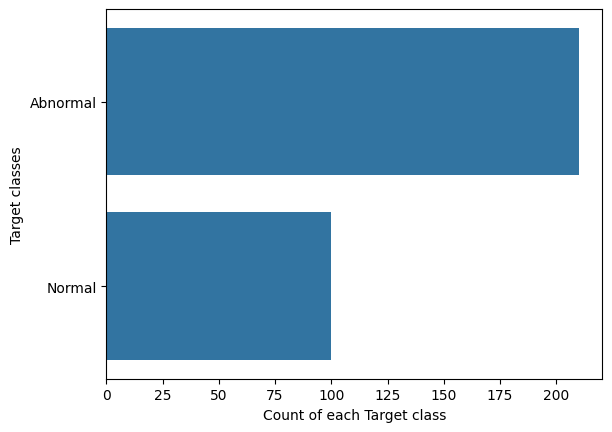

class
Abnormal    210
Normal      100
Name: count, dtype: int64


In [38]:
# Target class count
sns.countplot(y=df["class"] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()
print(df['class'].value_counts())


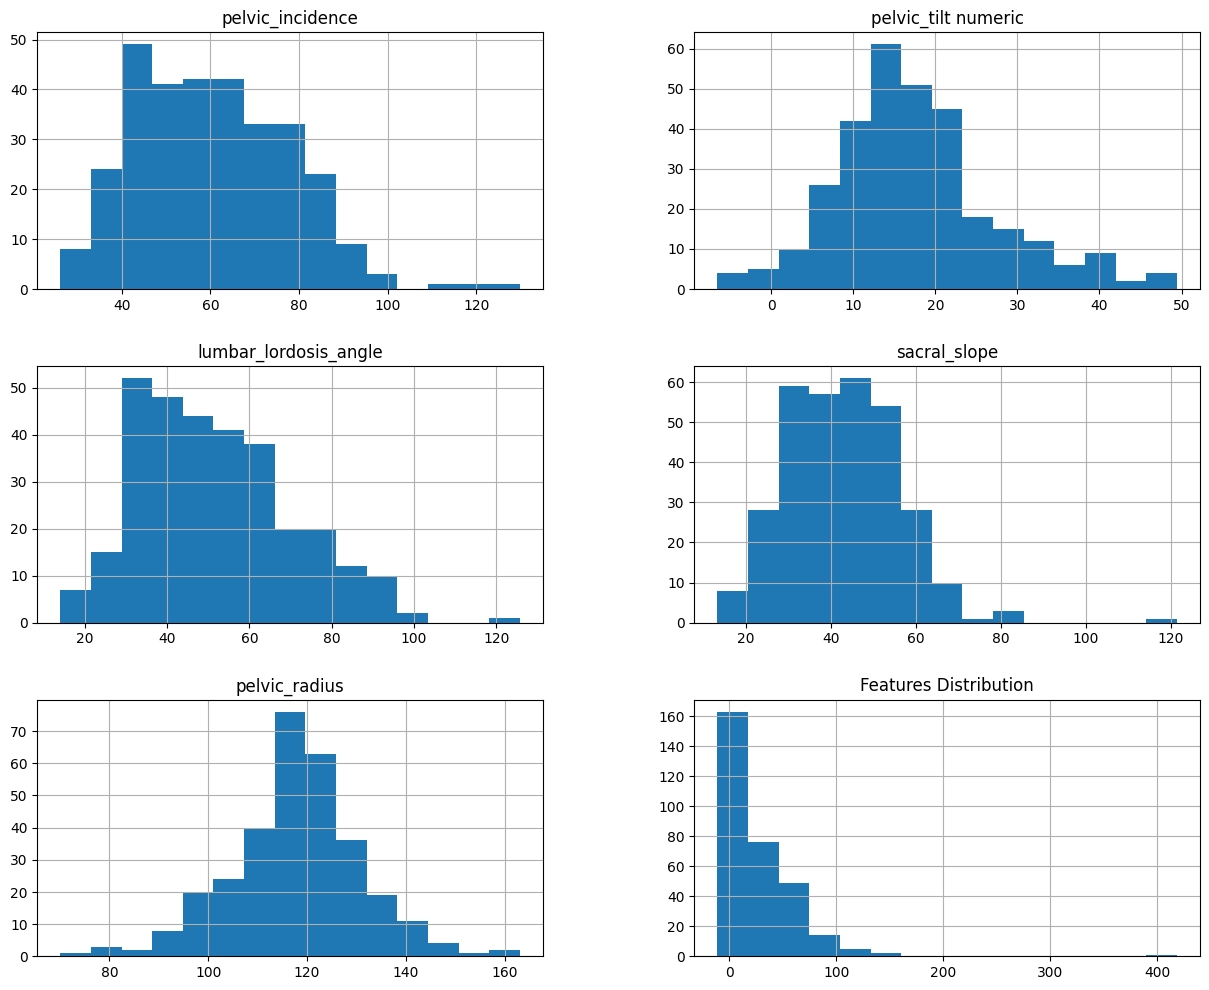

In [39]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

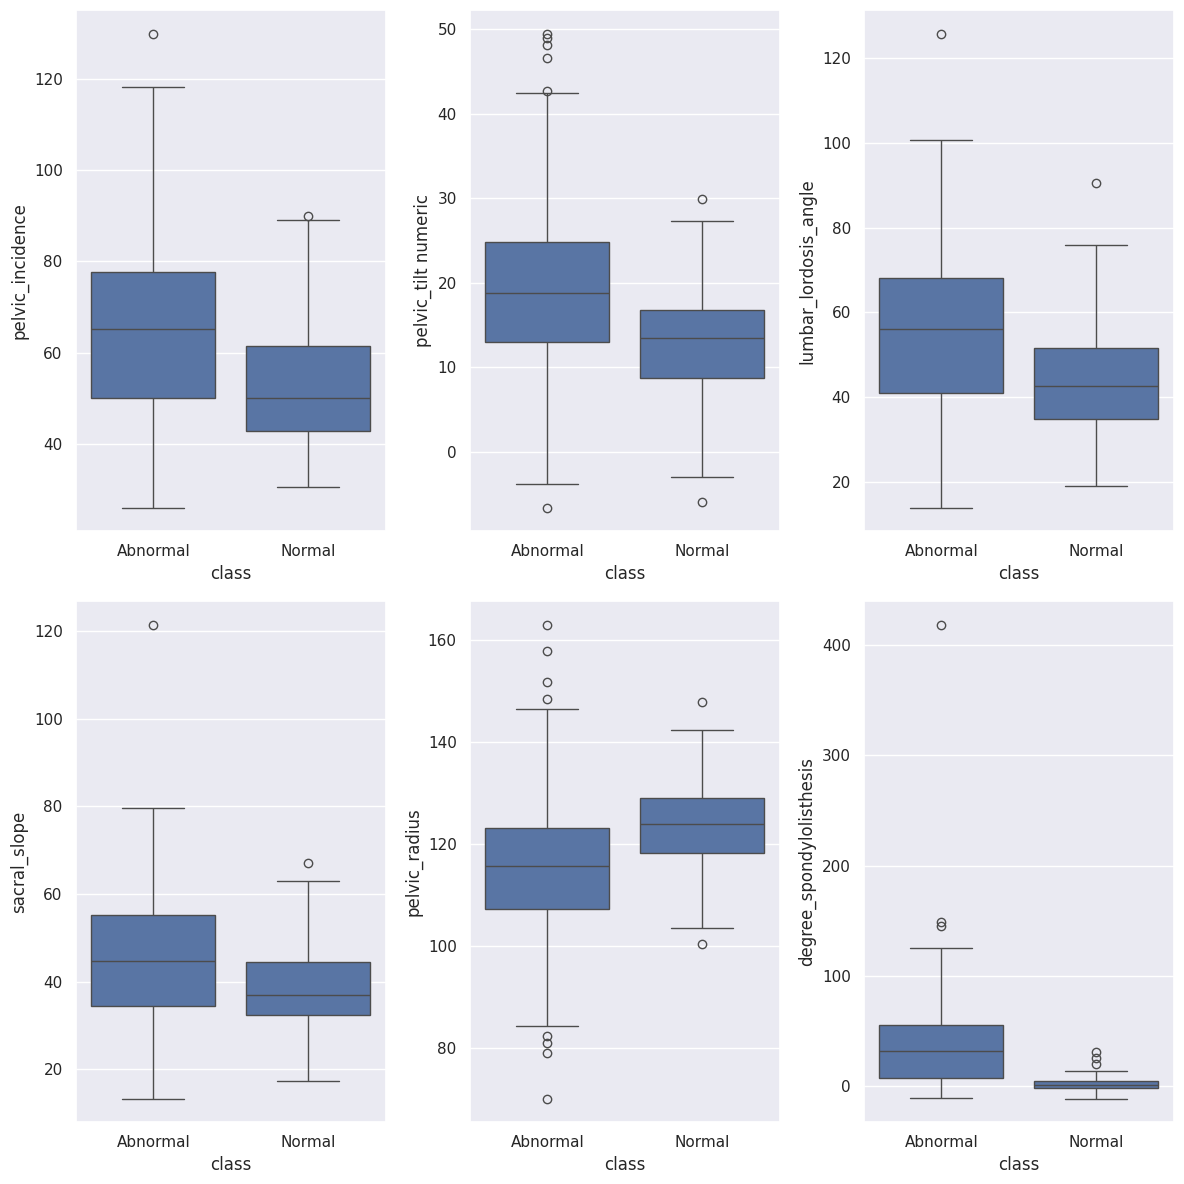

In [40]:
# Check the distribution of y variable corresponding to every x variable
n_cols = 3
input_num_columns = ['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
n_rows = math.ceil(len(input_num_columns)/n_cols)

sns.set(font_scale=1)

fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(12,12))
row = 0
col = 0
for i in input_num_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['class'], y = df[i], ax = axes)
    col += 1
plt.tight_layout()
plt.show()

In [41]:
# So, these variables will probably be helpful in predicted column.
# A useful predictor will typically have a different position of the boxes and / or the size of the boxes will be different.
# It does not however mean that if the boxes are similar positions, they are not useful.


<Figure size 800x160 with 0 Axes>

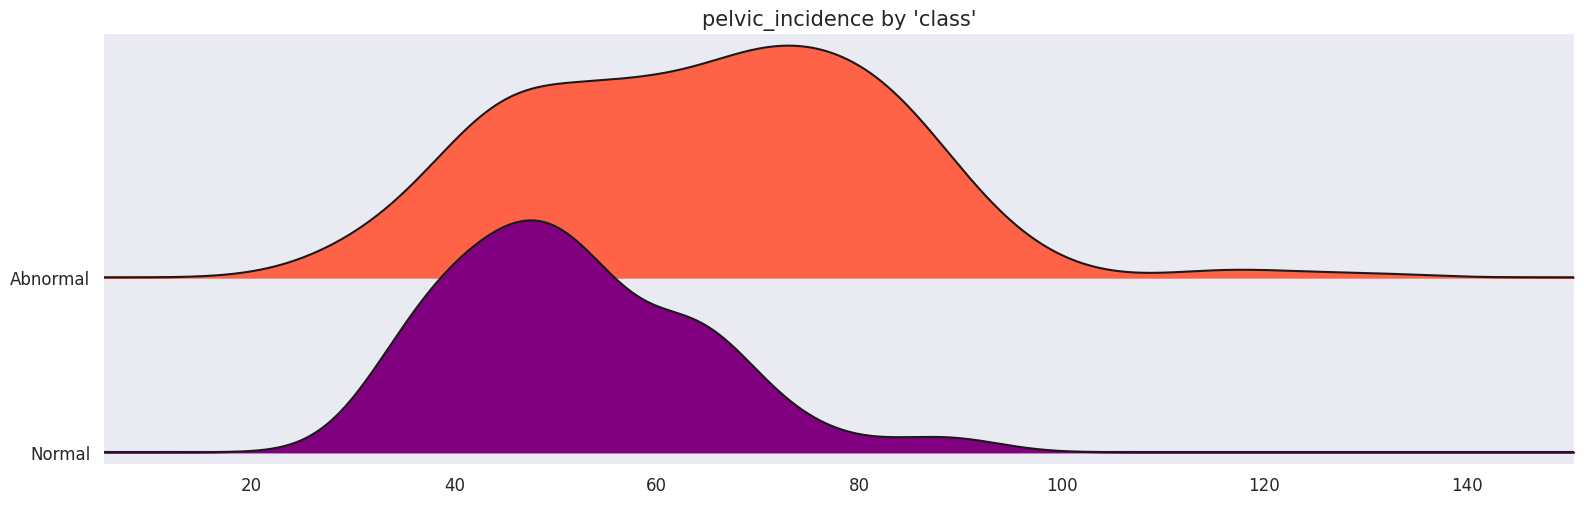

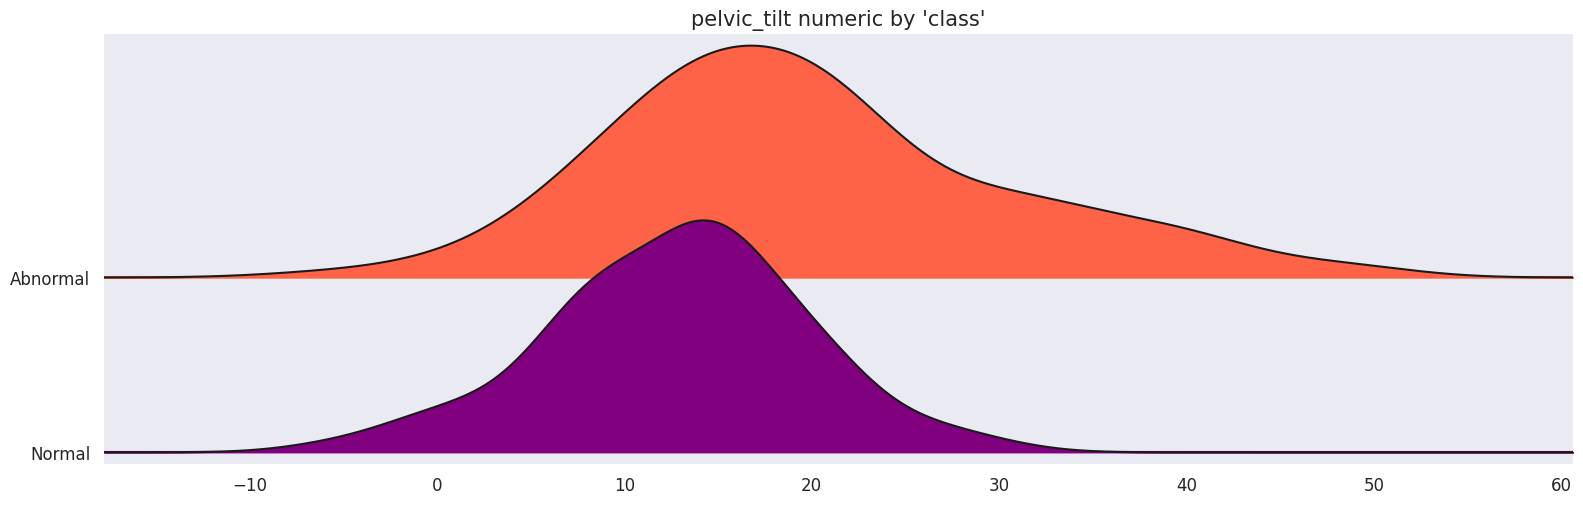

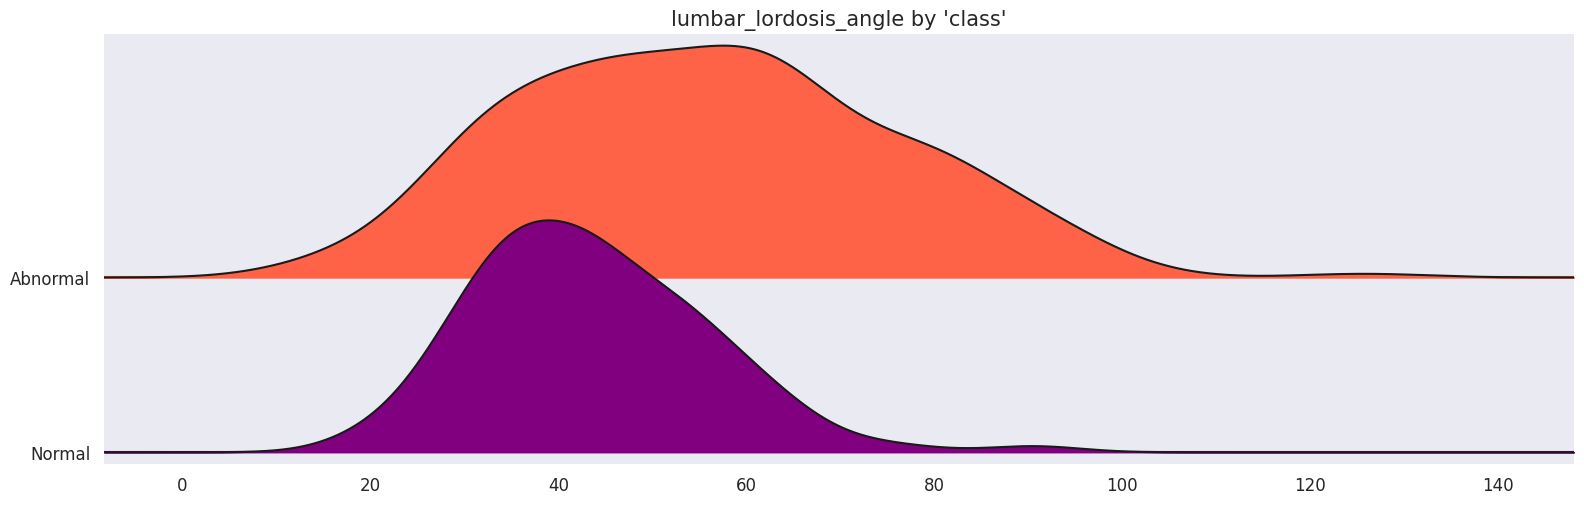

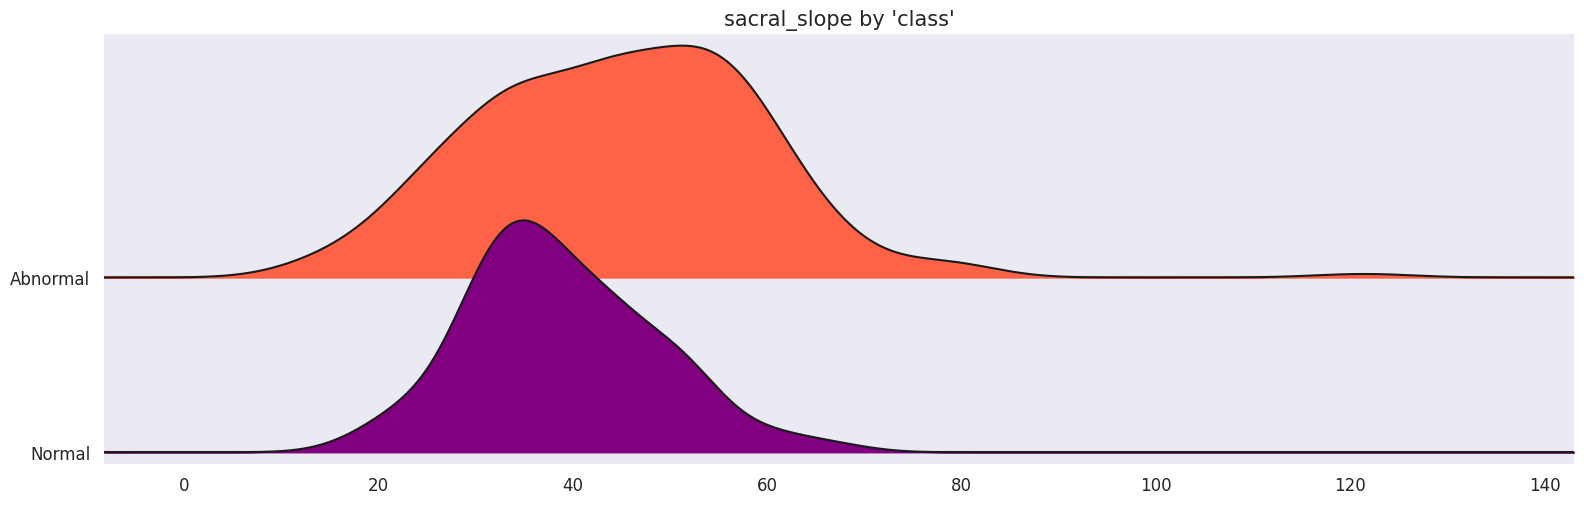

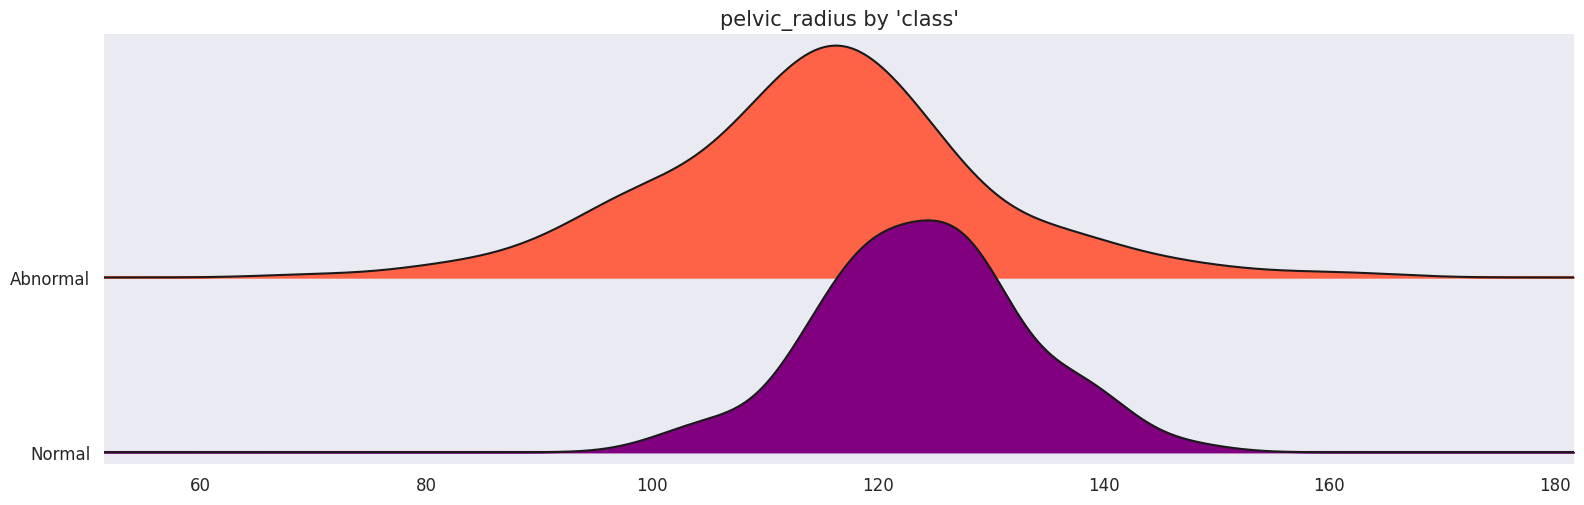

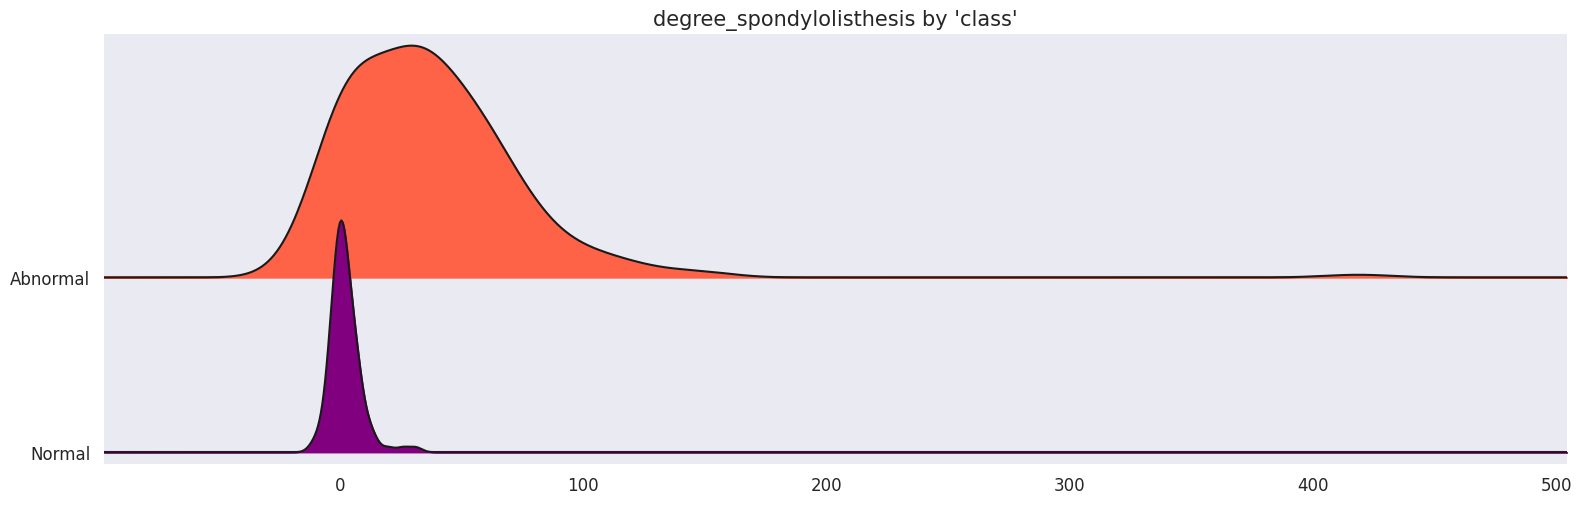

In [55]:
# Draw joyplots, one for each continuous variable. Visually different density curves imply the variable is likely useful to predict Y.
varbls = ['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']
plt.figure(figsize=(10,2), dpi= 80)
for i,var in enumerate(varbls):
    joypy.joyplot(df, column=[var], by="class", ylim='own', figsize=(16,5), color=['tomato', 'purple']);
    plt.title(f"{var} by 'class'", fontsize=15)
plt.show()


In [43]:
#Scatterplot matrix is useful when you have both the X and the Y variables to be numeric variables. In this case, we have the y variable (Class) to be binary categorical.

#Nevertheless, it can be interesting to see how two numeric predictor variables are related.

#If two numeric variables are correlated (that is as one increases, the other one increases as well), it’s possible that they both contribute the some overlapping information (redundant) that may be helpful in explaining (predicting) the Y.

#If a variable is a strong predictor, there usually will be a significant clustering of points.

#Why does clustering and patterns indicate the predictors are useful?

#Because, it signififies that for certain range of values between the two variables, the points tend to be of one particular class of Y.

#This reveals the ‘interaction effect’ between two plotted variables.


<Figure size 800x640 with 0 Axes>

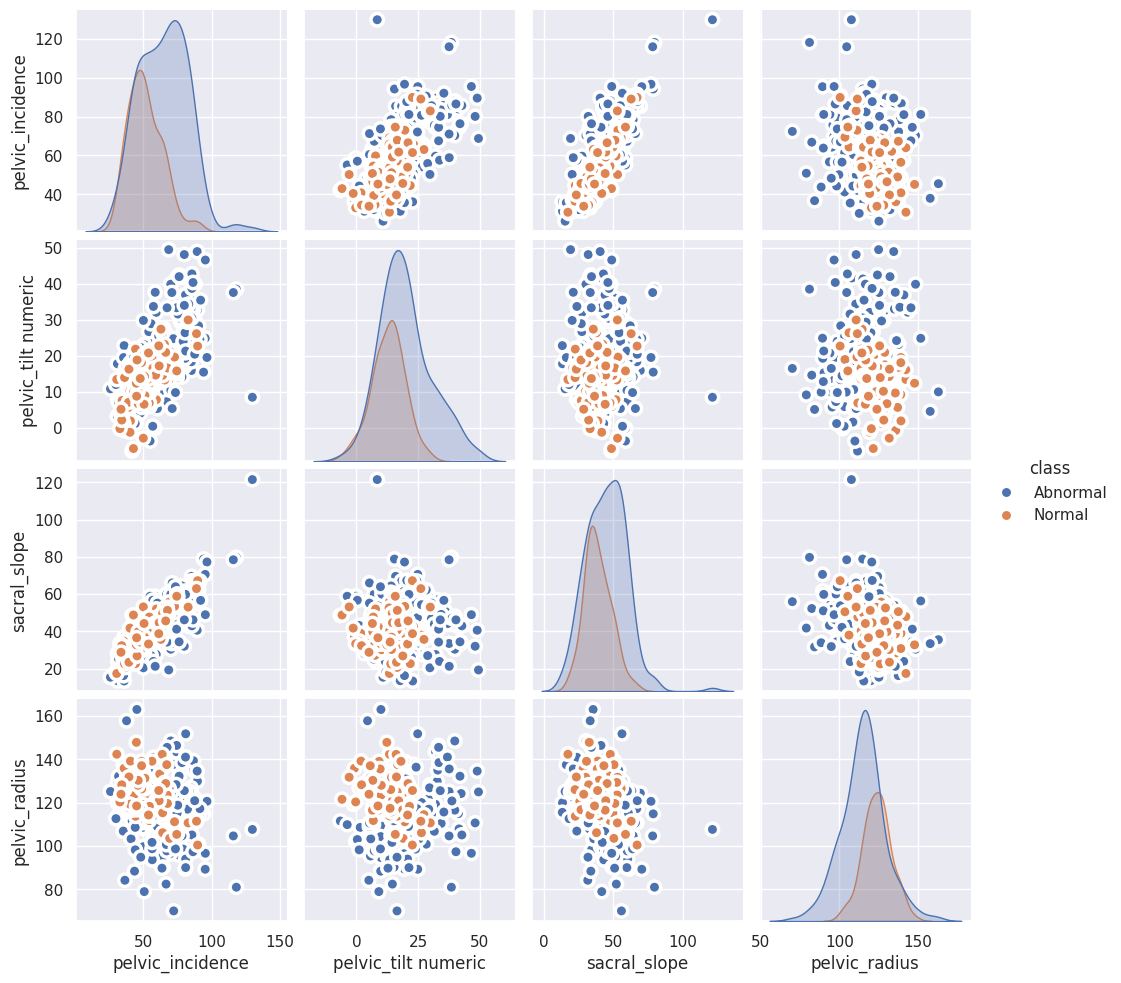

In [56]:
# pairplot with seaborn library
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df.loc[:, ['class','pelvic_incidence','pelvic_tilt numeric', 'sacral_slope','pelvic_radius']],
             kind="scatter", hue="class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()
#Veri çerçevesindeki belirli sütunları seçer. 'class' sütunu hedef değişkeni, diğerleri ise sayısal özellikleri temsil eder.
#hue="class": Renklendirme için kullanılacak sütunu belirtir. 'class' sütunu burada kullanılıyor, yani her bir sınıf farklı renkte gösterilecek.
#Bu çift çizim, belirtilen sayısal özellikler arasındaki ilişkiyi görselleştirir.


In [45]:
#Example: Pairplot with regression (‘reg’) option.

#Pairplot provides a regression option as well. But this is of more use when both your predictor AND response are numeric variables, in which case the points in the scatter plot reveal the nature of the relationship between X and Y.

#When X positively influence Y, the points will be distributed such that as X increases, Y also increases. The opposite applies for a negative relationship. Regardless, in both cases, where there is either a +ve or a -ve relationship, the X will be useful to predict the Y.

In [46]:
#So when will X NOT be useful to predict y?

#When the points are scattered completely random.

#Ok. That’s the idea behind looking at scatterplots. I wanted to tell this for the sake of completeness. But, in our case, the Y is a categorical variable, so, this plot is not of much use here. Nevertheless, here is how it looks.

<Figure size 800x640 with 0 Axes>

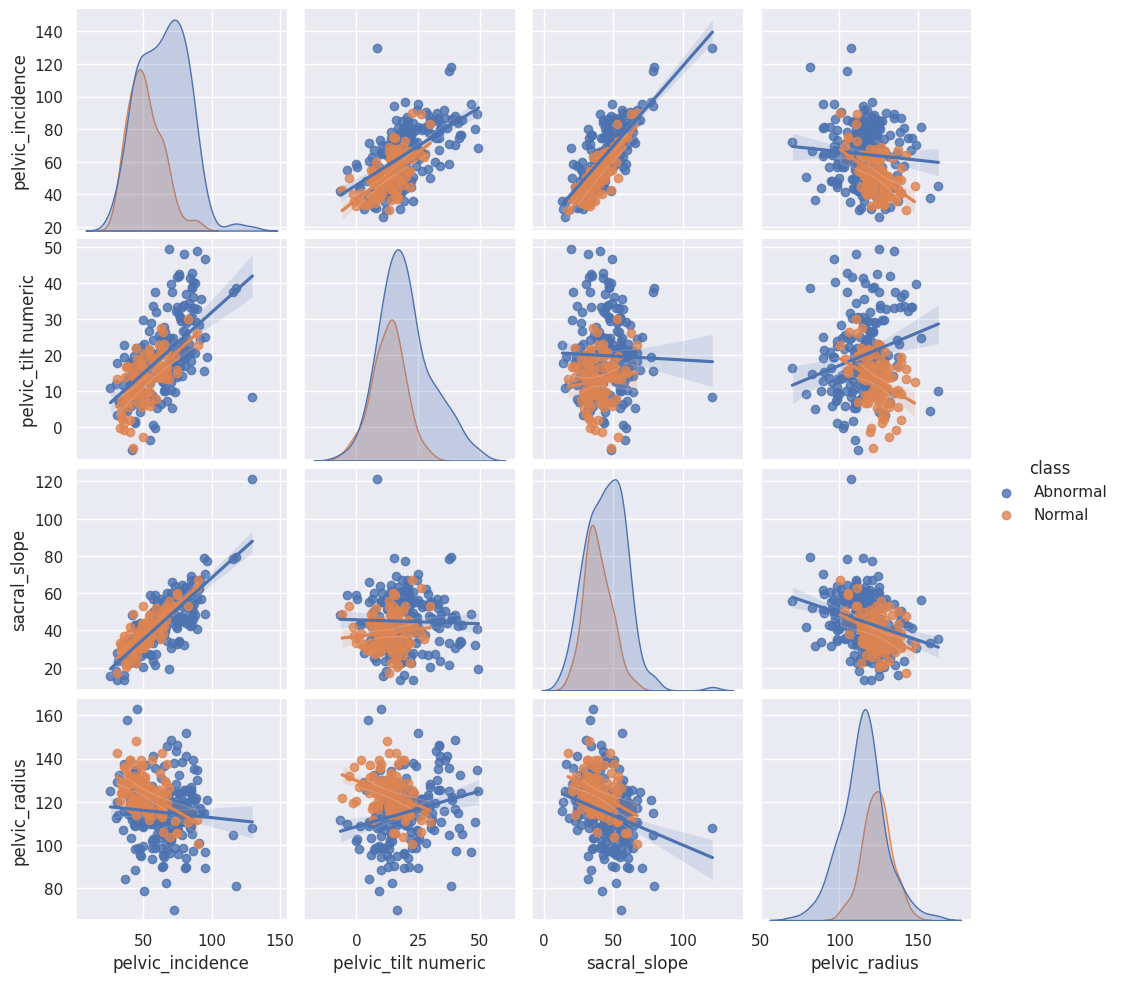

In [47]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df.loc[:, ['class','pelvic_incidence','pelvic_tilt numeric', 'sacral_slope','pelvic_radius']],
             kind="reg", hue="class")
plt.show()
# Burada regresion lineleri çizdik.Kind parametresi olarak 'reg' yazdık